# Hierarchical Clustering
###### Work on Linearly Separable dataset

### Two Types
#### 1. Agglomertive Clustring        2. Divisive Clustring


### 1. Agglomertive Clustring

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
dataset =pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Iris-Hierarchical Clustering dataset.csv')
dataset.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


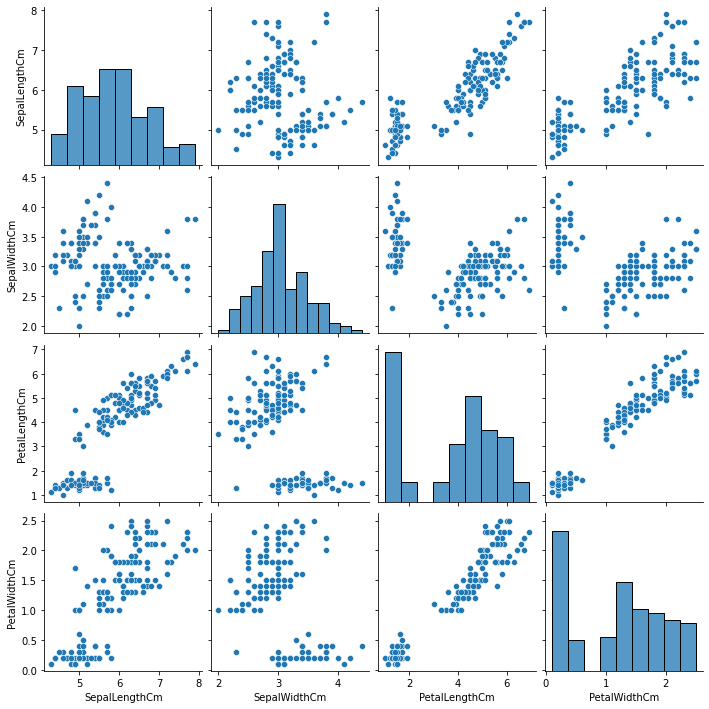

In [11]:
sns.pairplot(data=dataset)
plt.show()

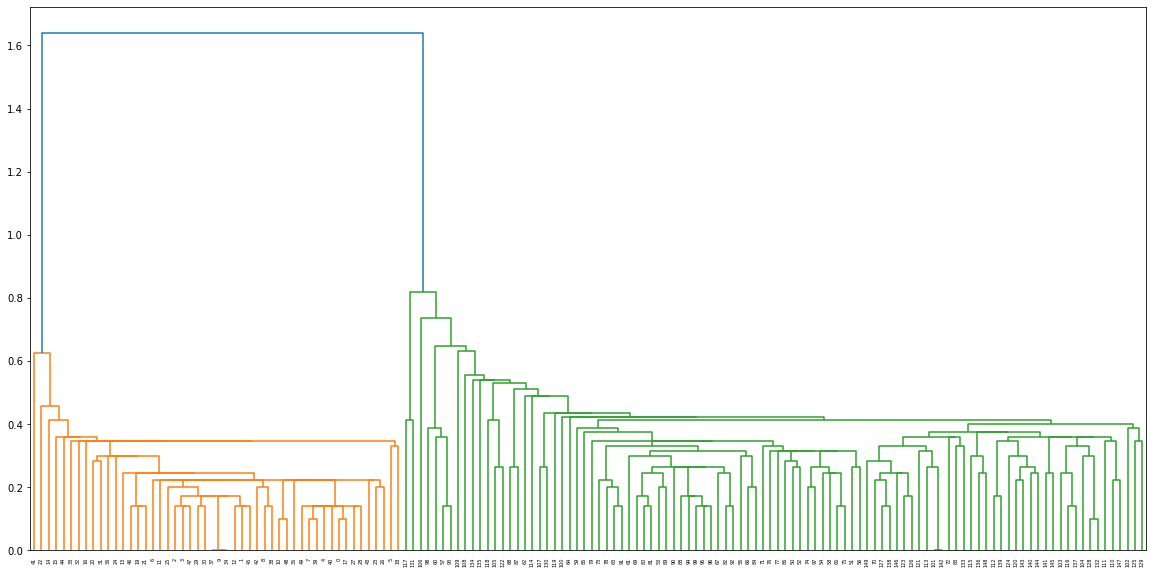

In [15]:
import scipy.cluster.hierarchy as sc

# Compute the linkage matrix
linkage_matrix = sc.linkage(dataset, method='single', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(20,10))
sc.dendrogram(linkage_matrix)
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
Agglo_clus =AgglomerativeClustering(n_clusters=2,linkage='single')
dataset['Predict'] =Agglo_clus.fit_predict(dataset)

In [17]:
dataset.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


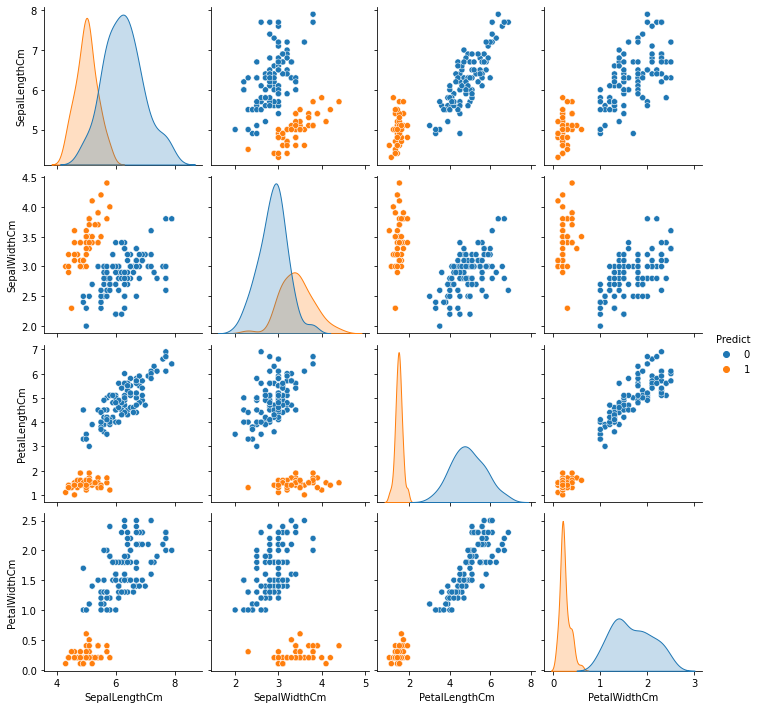

In [18]:
sns.pairplot(data=dataset ,hue='Predict')
plt.show()